In [167]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [168]:
data = pd.DataFrame(pd.read_csv('datasets/BreastCancer.csv'))

In [169]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [170]:
data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [172]:
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [173]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [174]:
data.shape

(116, 10)

In [175]:
data.boxplot()

<Axes: >

In [176]:
data.duplicated().sum()

0

In [177]:
x = data.drop(['Classification'], axis=1)
y = data['Classification']

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [179]:
cltp = DecisionTreeClassifier()
cltp.fit(x_train, y_train)

DecisionTreeClassifier()

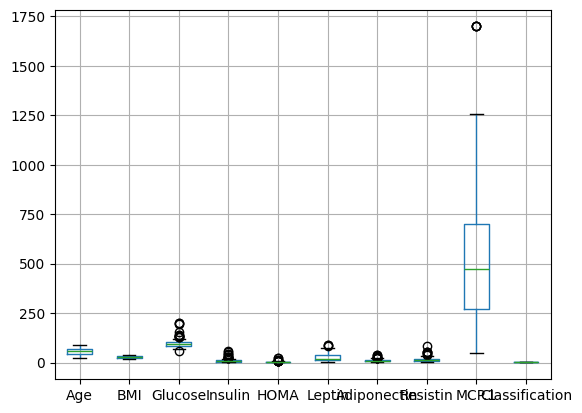

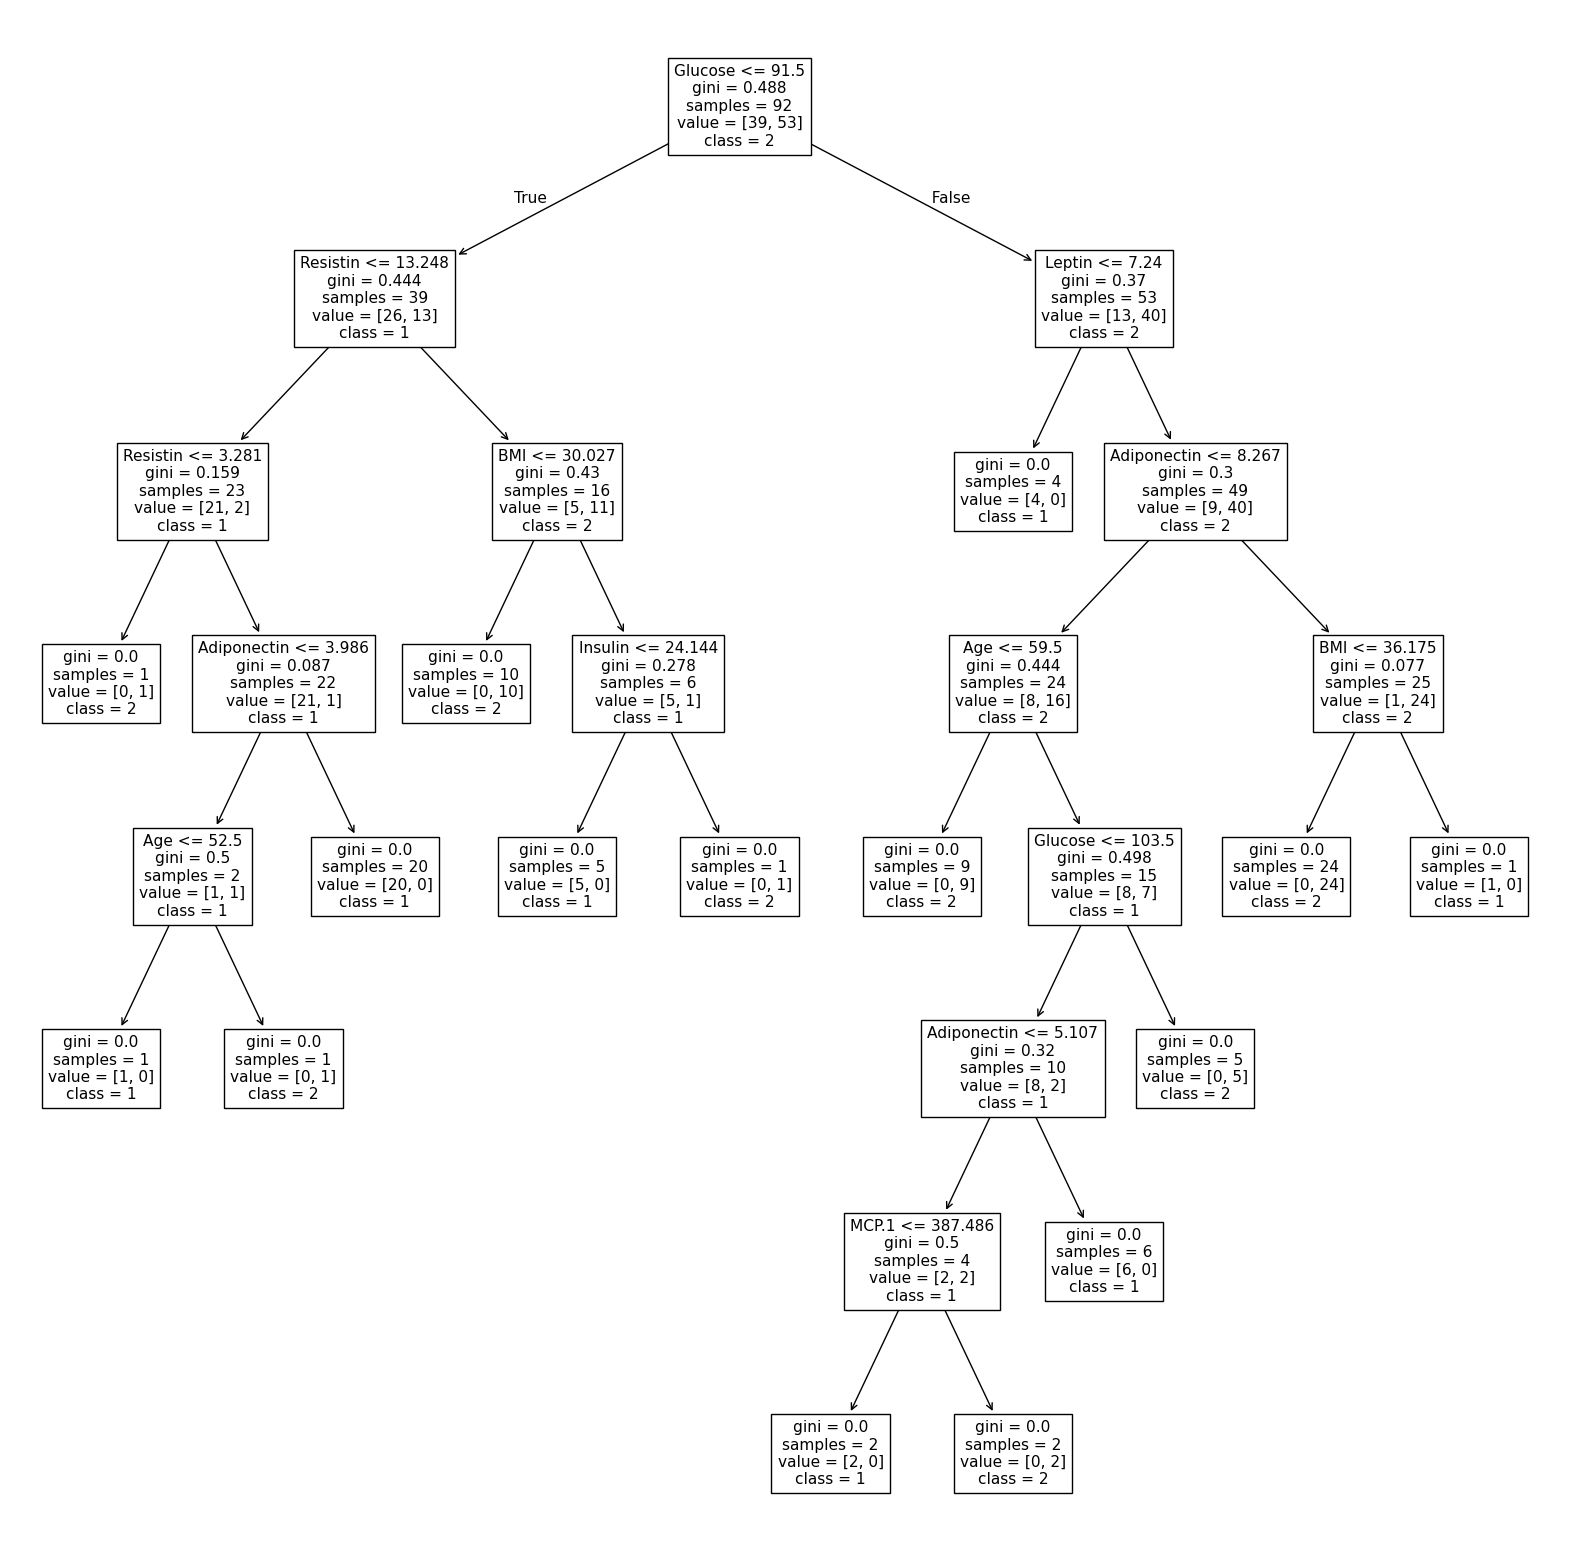

In [180]:
plt.figure(figsize=(20, 20))
plot_tree(clt, feature_names=(data.columns), class_names=['1', '2'])
plt.show()

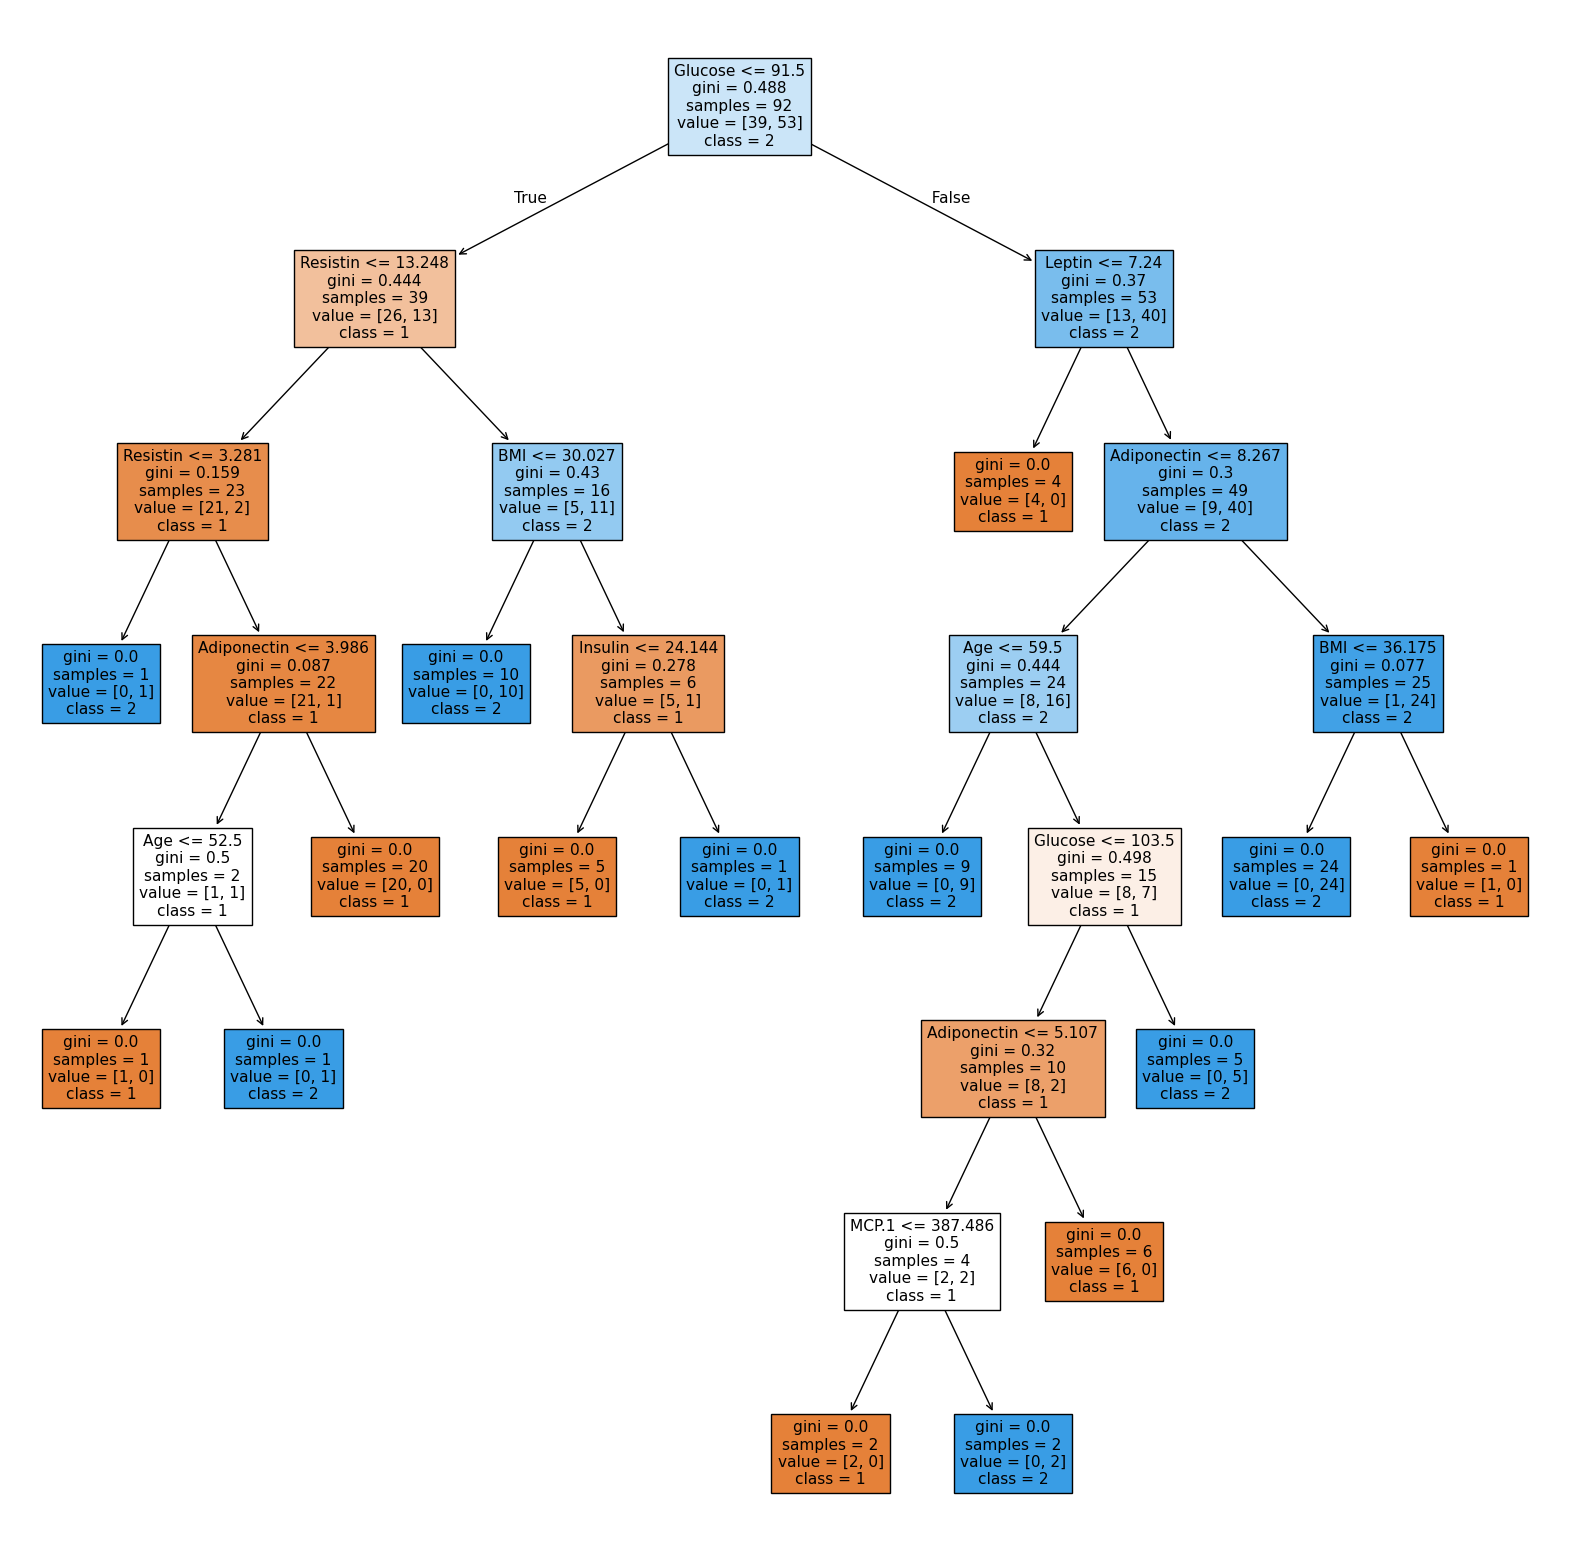

In [181]:
plt.figure(figsize=(20, 20))
plot_tree(clt, filled=True, feature_names=(data.columns), class_names=['1', '2'])
plt.show()

In [182]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [183]:
# get the prediction
y_pred = clt.predict(x_test)
y_pred

array([2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 1], dtype=int64)

In [184]:
r_squared = r2_score(y_test, y_pred) #getting the R squared value for predicted data
r_squared

-0.006993006993007089

In [185]:
accuracy = accuracy_score(y_test, y_pred) #getting the accuracy of the model
accuracy

0.75

In [186]:
confution = confusion_matrix(y_test, y_pred)
confution

array([[ 8,  5],
       [ 1, 10]], dtype=int64)

In [187]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.89      0.62      0.73        13
           2       0.67      0.91      0.77        11

    accuracy                           0.75        24
   macro avg       0.78      0.76      0.75        24
weighted avg       0.79      0.75      0.75        24



In [188]:
arr = np.array([45, 26.85, 92, 3.33, 0.755688, 54.68, 12.10, 10.96, 268.23]).reshape(1, 9)

In [189]:
cltp.predict(arr)

array([2], dtype=int64)